### Домашняя работа "Оценка точности модели, переобучение, регуляризация"
Преподаватель: Алексей Миронов, Наталья Баданина

Посчитать tpr и fpr в ноутбуке с лекции.

Убедиться, что график ROC AUC получается таким же, как и штатными средствами

Потроить график Precision - Recall на этих же данных



In [168]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv('affair_data.csv')
X = data[data.columns[:-1]]
Y = data['affair']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

0.7319371727748691

In [169]:
(predictions[:,1] > 0.5).shape, Y_test.values.shape

((1910,), (1910,))

In [170]:
y_pred = predictions[:,1] > 0.5
y_true = Y_test.values

In [171]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(1172, 131, 381, 226)

# TN, FP, FN TP

In [172]:
def conf_matrix(y_true, y_pred):
    tn = ((y_true == 0) * (y_pred == 0)).sum()
    tp = ((y_true == 1) * (y_pred == 1)).sum()
    fn = ((y_true == 1) * (y_pred == 0)).sum()
    fp = ((y_true == 0) * (y_pred == 1)).sum()
    return tn, fp, fn, tp

tn, fp, fn, tp = conf_matrix(y_true, y_pred)
tn, fp, fn, tp

(1172, 131, 381, 226)

In [173]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.7319371727748691

# ROC

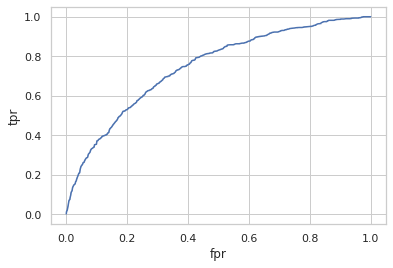

In [174]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])
roc = pd.DataFrame(np.array([fpr, tpr, thres]).T, columns=['fpr', 'tpr', 'thres'])
sns.lineplot(data=roc, x='fpr', y='tpr');

In [175]:
fpr[100], tpr[100], thres[100], 

(0.05372217958557176, 0.25370675453047775, 0.5872751893359788)

In [176]:
y_pred = predictions[:,1] > thres[100]
metrics(y_true, y_pred)

(0.25370675453047775,
 0.052954719877206444,
 0.6905829596412556,
 0.25370675453047775)

/home/dmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


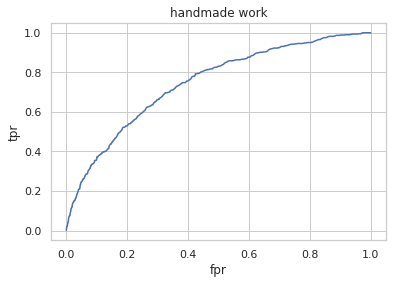

In [177]:
def metrics(y_true, y_pred):
    '''
    True Positive Rate (TPR)
    False Positive Rate (FPR)
    Precision
    Recall 
    '''
    tn, fp, fn, tp = conf_matrix(y_true, y_pred)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return tpr, fpr, precision, recall

def roc(y_true, predictions, num_steps=1000, eta=1e-8):

    roc_table = pd.DataFrame(columns=['threshold', 'tpr', 'fpr'])
    for step, threshold in enumerate(np.linspace(0 + eta, 1 - eta, num_steps)):
        y_pred = predictions > threshold
        roc_table.loc[step, 'threshold'] = threshold
        roc_table.loc[step, 'tpr'], roc_table.loc[step, 'fpr'], _, _  =  metrics(y_true, y_pred)
    return roc_table.sort_values('threshold', ascending=True).astype(float)

roc_tab = roc(y_true, predictions[:,1])  

sns.lineplot(data=roc_tab, x='fpr', y='tpr').set(title=f"handmade work");

# Precision-recall curve


In [178]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

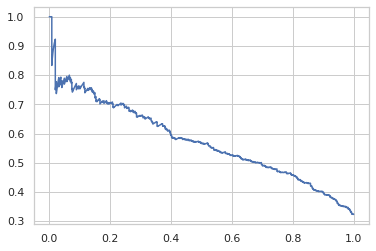

In [179]:
plt.plot(re, pr);

/home/dmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


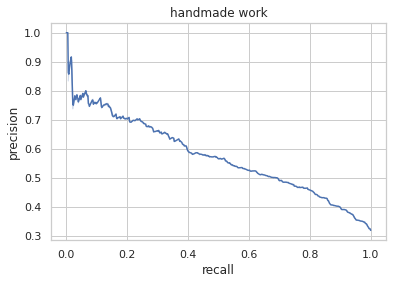

In [180]:
def precision_recall(y_true, predictions, num_steps=1000, eta=1e-8):

    roc_table = pd.DataFrame(columns=['threshold', 'precision', 'recall'])
    for step, threshold in enumerate(np.linspace(0 + eta, 1 - eta, num_steps)):
        y_pred = predictions > threshold
        roc_table.loc[step, 'threshold'] = threshold
        _, _, roc_table.loc[step, 'precision'], roc_table.loc[step, 'recall'] =  metrics(y_true, y_pred)
    return roc_table.sort_values('threshold', ascending=False).astype(float)

precision_recall_tab = precision_recall(y_true, predictions[:,1])  

sns.lineplot(data=precision_recall_tab, x='recall', y='precision').set(title=f"handmade work");